# Resume Category Classifier: An Automated Skills Recognition System

## Created by Gaurab Kundu

### Loading Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset, Creating a Pandas Dataframe and Have a look at it

In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
df.shape

(962, 2)

### Data Preprocessing

In [4]:
# Removing leading and trailing spaces from entries in the 'Category' column
df['Category'] = df['Category'].str.strip()

# Checking for missing values in the 'Category' column and displaying the count
print(df['Category'].isnull().sum())

# Converting the 'Category' column to categorical type
df['Category'] = df['Category'].astype('category')

0


### Exploring Categories

In [5]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Data Science                 40
Operations Manager           40
Sales                        40
Blockchain                   40
ETL Developer                40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

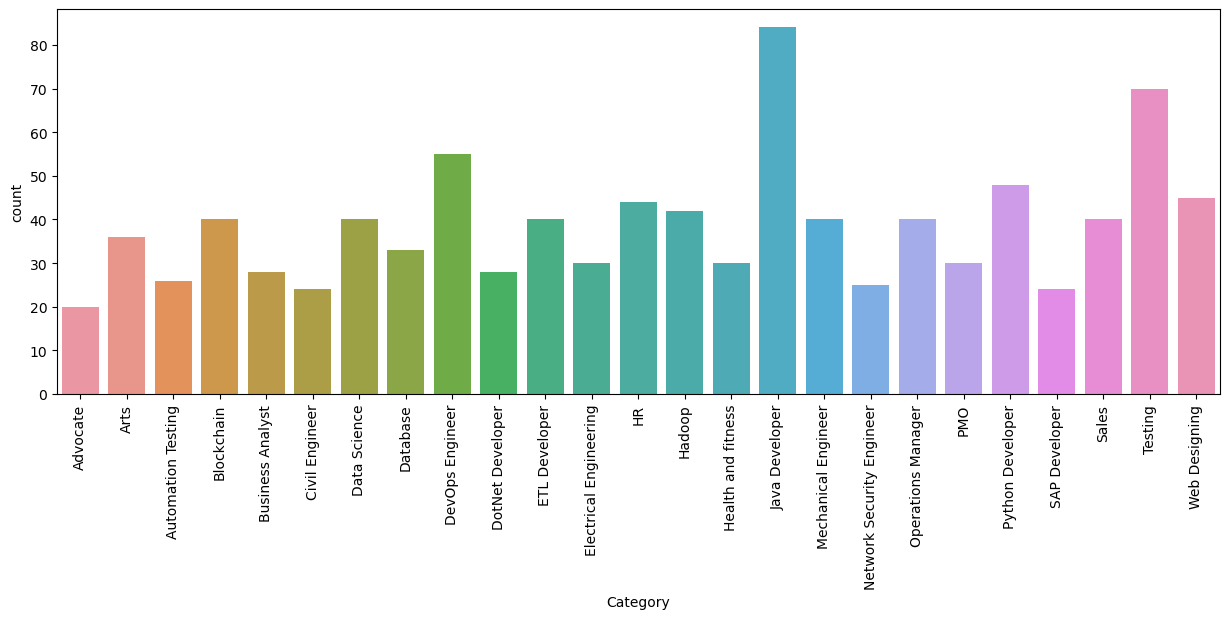

In [6]:
# Setting up the plot
plt.figure(figsize=(15, 5))

# Creating the count plot based on the categorical 'Category' column
sns.countplot(data=df, x='Category')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=90)

# Displaying the plot
plt.show()


In [7]:
# Displaying unique values present in the 'Category' column
print(df['Category'].unique())

['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing', ..., 'Hadoop', 'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing']
Length: 25
Categories (25, object): ['Advocate', 'Arts', 'Automation Testing', 'Blockchain', ..., 'SAP Developer', 'Sales', 'Testing', 'Web Designing']


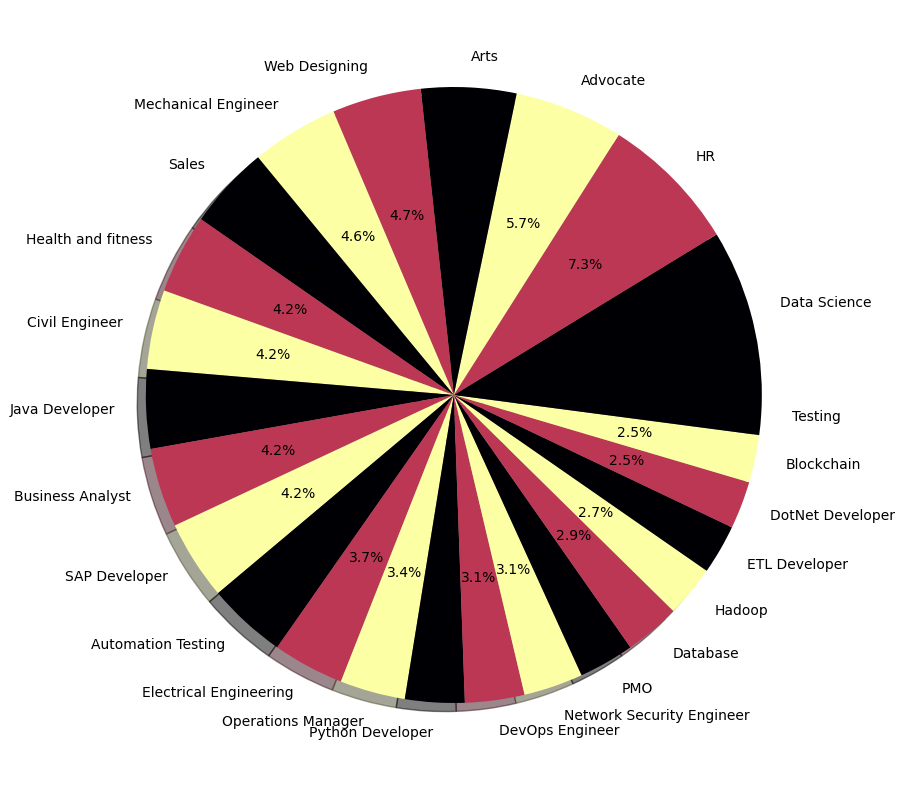

In [8]:
# Calculating the counts of each category in the 'Category' column
counts = df['Category'].value_counts()

# Retrieving unique labels/categories from the 'Category' column
labels = df['Category'].unique()

# Setting up the plot figure size
plt.figure(figsize=(15, 10))

# Creating a pie chart with counts, labels, percentages, shadows, and color scheme
plt.pie(counts,                    # Data for the pie chart (category counts)
        labels=labels,             # Labels for each slice of the pie
        autopct='%1.1f%%',        # Display percentages on the pie chart
        shadow=True,              # Display shadow for aesthetics
        colors=plt.cm.inferno(np.linspace(0, 1, 3))  # Color scheme for the pie slices
        )

# Displaying the pie chart
plt.show()

### Exploring Resume

In [9]:
df['Category'][0]

'Data Science'

In [10]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

### Data Cleaning
- 1 URLs,
- 2 hashtags,
- 3 mentions,
- 4 special letters,
- 5 punctuations:

In [11]:
import re  # Importing the 're' module for regular expressions

def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt) # Removing URLs
    cleanText = re.sub('RT|cc', ' ', cleanText) # Removing 'RT' and 'cc'
    cleanText = re.sub('#\S+\s', ' ', cleanText) # Removing hashtags (#)
    cleanText = re.sub('@\S+', '  ', cleanText) # Removing mentions (@)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText) # Removing special characters using regex
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) # Removing non-ASCII characters
    cleanText = re.sub('\s+', ' ', cleanText) # Removing extra whitespace
    return cleanText


In [12]:
# Applying the cleanResume function to the 'Resume' column of the DataFrame
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [13]:
# Accessing the first entry in the 'Resume' column of the DataFrame
resume_entry = df['Resume'][0]

resume_entry

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

### Words into Categorical Value

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder to the 'Category' column in the DataFrame
le.fit(df['Category'])

# Transform the 'Category' column using the fitted LabelEncoder
df['Category'] = le.transform(df['Category'])

# Display unique values after transformation
df.Category.unique()


array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23], dtype=int64)

In [16]:
# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

### Vectorization

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing a TfidfVectorizer object with English stop words
tfidf = TfidfVectorizer(stop_words='english')

# Fitting the TfidfVectorizer to the 'Resume' column in the DataFrame
tfidf.fit(df['Resume'])

# Transforming the 'Resume' column using the fitted TfidfVectorizer
requiredText = tfidf.transform(df['Resume'])

### Splitting the Data

In [18]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
# requiredText: The feature matrix (TF-IDF transformed text)
# df['Category']: The target variable (categories)
# test_size=0.2: 20% of the data will be used for testing, 80% for training
# random_state=42: Using a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2, random_state=42)

In [19]:
X_train.shape

(769, 7351)

In [20]:
X_test.shape

(193, 7351)

### Train the Model and Print the Classification Report

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# Initialize a OneVsRestClassifier with KNeighborsClassifier as the base estimator
clf = OneVsRestClassifier(KNeighborsClassifier())

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the categories for the test set
ypred = clf.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.9844559585492227


In [22]:
print("Predicted Categories for Test Set:", ypred)

Predicted Categories for Test Set: [15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


### Prediction System

In [23]:
import pickle

# Saving the TfidfVectorizer object as 'tfidf.pkl' using pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))

# Saving the trained classifier as 'clf.pkl' using pickle
pickle.dump(clf, open('clf.pkl', 'wb'))

### Testing the Prediction System

In [24]:
myresume = """I'm Gaurab Kundu, a passionate Data Science enthusiast based in Kolkata, India. 
As a 3rd-year BTech Computer Science Engineering student specializing in Data Science, 
I possess a solid foundation in Data Analytics, Data Visualization, Machine Learning, Deep Learning, Python, R, Excel, SQL, Tableau and Power BI.
With a dedication to continuous learning, I've completed various online courses and professional certificates from esteemed institutions like 
IBM, DeepLearning.AI, University of Michigan, Stanford University, University of California Davis, Johns Hopkins University, and Duke University. 
As a self-taught Python and R programmer, I thrive on exploring opportunities to gain practical experience in Data Science, Machine Learning, and Artificial Intelligence.
I believe in constant upskilling and possess the ability to provide clear insights, making me valuable in different job roles. 
My true passion lies in tackling complex problems using data-driven approaches.
I'm eager to explore internship and job opportunities where I can apply my skills to real-world challenges, 
contribute to meaningful projects, and continue my growth in the fascinating world of Data Science.
If you're looking for a proactive, results-oriented individual with a commitment to excellence, 
I would love to connect with you! Let's explore how I can contribute to your organization's success and foster my personal and professional growth in the process.
Contact & Sources
Email: gaurabkundu2003@gmail.com
Phone: 8967784717
Github: https://github.com/GaurabKundu1
Linkdin: https://www.linkedin.com/in/gaurab-kundu/
ABOUT ME
WORK EXPERIENCE
SKILLES
GAURAB KUNDU
LANGUAGES
English
Hindi
Bengali
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [25]:
import pickle

# Load the trained classifier from 'clf.pkl' file
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume text using the previously defined cleanResume function
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume text using the previously trained TfidfVectorizer (tfidfd)
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier on the transformed resume features
prediction_id = clf.predict(input_features)[0]

# Map the predicted category ID to category name using the predefined category_mapping dictionary
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

# Print the predicted category name and ID
print("Predicted Category:", category_name)
print("Prediction ID:", prediction_id)


Predicted Category: Data Science
Prediction ID: 6
